In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import pandas as pd
from scipy import stats
import os

In [2]:
os.chdir('/Users/hongrudu/Desktop/COVID_Vaccination_rate/results')

In [3]:
x1 = pd.read_csv('interaction_x1_CHR.tsv').drop(columns = 'Unnamed: 0')
x2 = pd.read_csv('interaction_x2_CHR.tsv').drop(columns = 'Unnamed: 0')
fit = pd.read_csv('interaction_fit_CHR.tsv').drop(columns = 'Unnamed: 0')


In [4]:
data = pd.read_csv('Omicron_interacrion_ALE_CHR.csv').drop(columns = {'Unnamed: 0'})


In [5]:
data = data.drop_duplicates().reset_index().drop(columns = ['index'])
x1, x2 = np.meshgrid(x1, x2)
fit = fit['V1'].values
fit = fit.reshape(40, 40)

Text(0, 0.5, 'Y-axis')

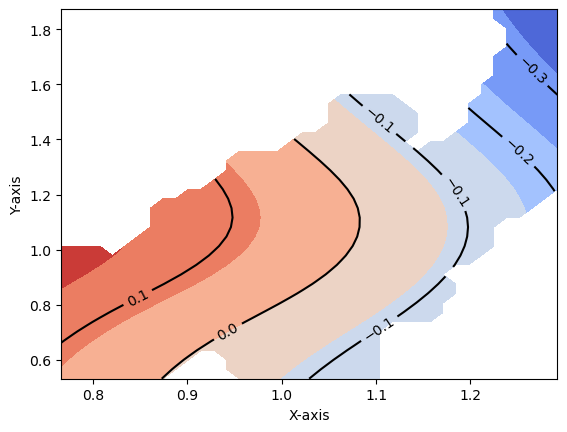

In [6]:
# rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Define levels in z-axis where we want lines to appear
levels = np.array([-0.5, -0.4, -0.3,-0.2, -0.1, 0, 0.1, 0.2])

# Generate a color mapping of the levels we've specified
import matplotlib.cm as cm # matplotlib's color map library
cpf = ax.contourf(x1,x2,fit, len(levels), cmap='coolwarm')

# Set all level lines to black
line_colors = ['black' for l in cpf.levels]

# Make plot and customize axes
cp = ax.contour(x1,x2,fit, levels=levels, colors=line_colors)
ax.clabel(cp, fontsize=10, colors=line_colors)
# plt.xticks([0,0.5,1])
# plt.yticks([0,0.5,1])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
# plt.colorbar()


In [7]:
var_name = ['RPI_12_Weeks_lag4', 'RGP_lag2',
       'RGV_lag2', 'ROPV_lag2', 'RUV_lag2', 'RWTR_lag2']
var_label = ['Relative previous infections (12 weeks)', 
             'Relative government response index', 'Relative gym visits', 
             'Relative physician visits','Relative university visits', 'Relative weekly testing rate']

In [8]:
sig_label = np.empty((2, 4),  dtype=object)
sig_label[0, 0] = '***'
sig_label[0, 1] = '***'
sig_label[0, 2] = '*'
sig_label[0, 3] = ' '
sig_label[1, 0] = '**'
sig_label[1, 1] = '***'
sig_label[1, 2] = '***'
# sig_label[1, 3] = 'Pre-Delta Wave ***'

Text(0.05, 0.9, 'h')

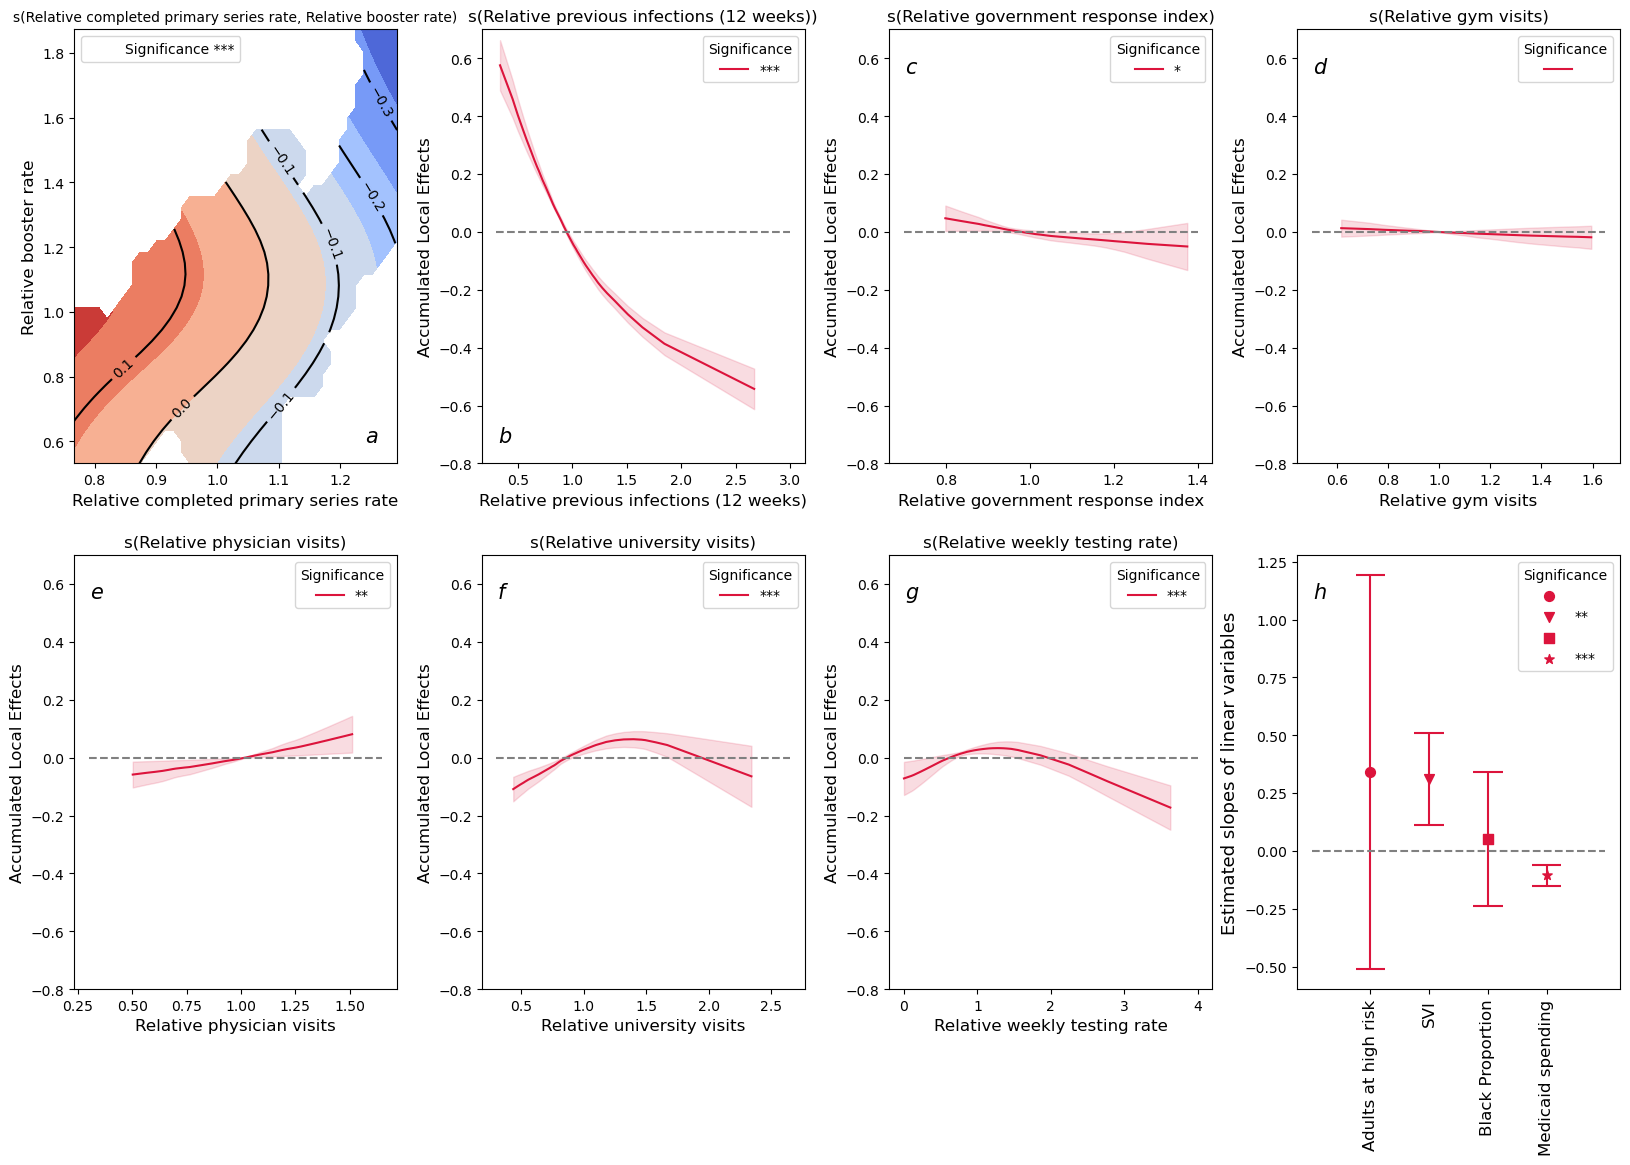

In [11]:
fig, axs = plt.subplots(2, 4, figsize = (16,10))
plt.tight_layout(pad=0.4, w_pad=3, h_pad=4.5)

levels = np.array([-0.5, -0.4, -0.3,-0.2, -0.1, 0, 0.1, 0.2])
cpf = axs[0,0].contourf(x1,x2,fit, len(levels), cmap='coolwarm')

# axs[0,1].contour(x1,x2,fit, levels=levels, colors=line_colors)
line_colors = ['black' for l in cpf.levels]

# Make plot and customize axes
cp = axs[0,0].contour(x1,x2,fit, levels=levels, colors=line_colors)
axs[0,0].clabel(cp, fontsize=10, colors=line_colors)
# plt.xticks([0,0.5,1])
# plt.yticks([0,0.5,1])
axs[0,0].set_xlabel('Relative completed primary series rate', fontsize=12)
axs[0,0].set_ylabel('Relative booster rate', fontsize=12)
axs[0,0].set_title('s(Relative completed primary series rate, Relative booster rate)', fontsize = 10)
axs[0,0].legend(['Significance ***'], loc = 'upper left')


# fig.colorbar(surf, ax=axs[0,0])
for i, j in [(0,1), (0,2), (0,3)]:
    plt.setp(axs[i,j], ylim=(-0.8, 0.7))
    var_all = data[data['Var'] == var_name[i*3 + j -1]]['var']
    est_all = data[data['Var'] == var_name[i*3 + j -1]]['est']
    se_all = data[data['Var'] == var_name[i*3 + j -1]]['se']
    
    axs[i,j].plot(var_all, est_all, color = 'crimson', label = sig_label[i,j])
    axs[i,j].fill_between(var_all, est_all + 1.96*se_all, 
                      est_all - 1.96*se_all, color = 'crimson', alpha =.15)
#     axs[i,j].set_ylim([-0.8, 0.6])
    axs[i,j].set_ylabel('Accumulated Local Effects', fontsize = 12)
    axs[i,j].set_xlabel(var_label[i*3 + j - 1], fontsize = 12)
    axs[i,j].set_title('s(' + var_label[i*3 + j - 1] + ')', fontsize = 12)
    axs[i,j].legend(title = 'Significance')
    
for i, j in [(1,0), (1,1), (1,2)]:
    plt.setp(axs[i,j], ylim=(-0.8, 0.7))
    var_all = data[data['Var'] == var_name[i*3 + j]]['var']
    est_all = data[data['Var'] == var_name[i*3 + j]]['est']
    se_all = data[data['Var'] == var_name[i*3 + j]]['se']
    
    axs[i,j].plot(var_all, est_all, color = 'crimson', label = sig_label[i,j])
    axs[i,j].fill_between(var_all, est_all + 1.96*se_all, 
                      est_all - 1.96*se_all, color = 'crimson', alpha =.15)
#     axs[i,j].set_ylim([-0.8, 0.6])
    axs[i,j].set_ylabel('Accumulated Local Effects', fontsize = 12)
    axs[i,j].set_xlabel(var_label[i*3 + j], fontsize = 12)
    axs[i,j].set_title('s(' + var_label[i*3 + j] + ')', fontsize = 12)
    axs[i,j].legend(title = 'Significance')

axs[0,1].hlines(y=0, color='grey', xmin=0.3, xmax=3, linestyle = '--')
axs[0,2].hlines(y=0, color='grey', xmin=0.7, xmax=1.4, linestyle = '--')
axs[0,3].hlines(y=0, color='grey', xmin=0.5, xmax=1.65, linestyle = '--')
axs[1,0].hlines(y=0, color='grey', xmin=0.3, xmax=1.65, linestyle = '--')
axs[1,1].hlines(y=0, color='grey', xmin=0.3, xmax=2.65, linestyle = '--')
axs[1,2].hlines(y=0, color='grey', xmin=0, xmax=4, linestyle = '--')

####Plot parametric effects for adults at high risk
axs[1,3].set_xticks([1, 2, 3, 4], 
                    ['Adults at high risk', 'SVI', 'Black Proportion', 'Medicaid spending'], 
                    fontsize = 12,
                    rotation=90)

axs[1,3].scatter([1], [0.34045], color = 'crimson', marker = 'o', s = 50, label = ' ')
pre_d_upper =  0.34045 + stats.t.ppf(1-0.025, 494)*0.43391
pre_d_lower =  0.34045 - stats.t.ppf(1-0.025, 494)*0.43391
axs[1,3].hlines(y=pre_d_upper, color='crimson', xmin=0.75, xmax=1.25)
axs[1,3].hlines(y=pre_d_lower, color='crimson', xmin=0.75, xmax=1.25)
axs[1,3].vlines(x=1, color='crimson', ymin=pre_d_lower, ymax=pre_d_upper)

axs[1,3].scatter([2], [0.31098], color = 'crimson', marker = 'v', s = 50, label = '**')
pre_d_upper =  0.31098 + stats.t.ppf(1-0.025, 494)*0.10056
pre_d_lower =  0.31098 - stats.t.ppf(1-0.025, 494)*0.10056
axs[1,3].hlines(y=pre_d_upper, color='crimson', xmin=1.75, xmax=2.25)
axs[1,3].hlines(y=pre_d_lower, color='crimson', xmin=1.75, xmax=2.25)
axs[1,3].vlines(x=2, color='crimson', ymin=pre_d_lower, ymax=pre_d_upper)

axs[1,3].scatter([3], [0.05077], color = 'crimson', marker = 's', s = 50, label = ' ')
pre_d_upper =  0.05077 + stats.t.ppf(1-0.025, 494)*0.14721
pre_d_lower =  0.05077 - stats.t.ppf(1-0.025, 494)*0.14721
axs[1,3].hlines(y=pre_d_upper, color='crimson', xmin=2.75, xmax=3.25)
axs[1,3].hlines(y=pre_d_lower, color='crimson', xmin=2.75, xmax=3.25)
axs[1,3].vlines(x=3, color='crimson', ymin=pre_d_lower, ymax=pre_d_upper)

axs[1,3].scatter([4], [-0.10528], color = 'crimson', marker = '*', s = 50, label = '***')
pre_d_upper =  -0.10528 + stats.t.ppf(1-0.025, 494)*0.02345
pre_d_lower =  -0.10528 - stats.t.ppf(1-0.025, 494)*0.02345
axs[1,3].hlines(y=pre_d_upper, color='crimson', xmin=3.75, xmax=4.25)
axs[1,3].hlines(y=pre_d_lower, color='crimson', xmin=3.75, xmax=4.25)
axs[1,3].vlines(x=4, color='crimson', ymin=pre_d_lower, ymax=pre_d_upper)

axs[1,3].hlines(y=0, color='grey', xmin=0, xmax=5, linestyle = '--')
axs[1,3].legend(title = 'Significance')
axs[1,3].set_ylabel('Estimated slopes of linear variables', fontsize = 13)

plt.text(0.9, 0.05, "a", transform=axs[0,0].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.05, "b", transform=axs[0,1].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.9, "c", transform=axs[0,2].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.9, "d", transform=axs[0,3].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.9, "e", transform=axs[1,0].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.9, "f", transform=axs[1,1].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.9, "g", transform=axs[1,2].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.9, "h", transform=axs[1,3].transAxes, fontstyle = 'italic', fontsize = 15)


In [12]:
fig.savefig('/Users/hongrudu/Desktop/COVID_Vaccination_rate/figures/Figure_2.png', bbox_inches='tight', dpi=400)